In [213]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [231]:
breast_cancer = sklearn.datasets.load_breast_cancer()  #加载sklearn中的乳腺癌数据集
#print(breast_cancer)

In [215]:
data = breast_cancer.data                              #将乳腺癌数据集的数据信息赋值给变量data
target = breast_cancer.target                          #将乳腺癌数据集的类别数据赋值给变量target
columns=breast_cancer.feature_names                    #将乳腺癌数据集的标签名称赋值给变量columns
print(data)
print(target)
print(columns)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [216]:
print(data.shape,target.shape)     #查看data和target的维度

(569, 30) (569,)


In [217]:
Data=pd.DataFrame(data, columns=columns)       #将乳腺癌数据集的数据信息和标签名称合并后赋值给Data
Data['classfy'] = target                       #在Data中添加classfy列，里面存放数据集的分类信息
Data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classfy
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [218]:
Data['classfy'].value_counts()          #查看数据集中各类别的数目

1    357
0    212
Name: classfy, dtype: int64

In [219]:
X = Data.drop('classfy', axis=1)       #将乳腺癌数据集的数据信息赋值给X
Y = Data['classfy']                    #将乳腺癌数据集的类别数据赋值给变量Y

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1) #训练集：测试集=9:1

In [226]:
x_train=X_train.values
x_test=X_test.values
print(X_train)
print(X_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
430       14.900         22.53          102.10      685.0          0.09947   
48        12.050         14.63           78.04      449.3          0.10310   
105       13.110         15.56           87.21      530.2          0.13980   
467        9.668         18.10           61.06      286.3          0.08311   
547       10.260         16.58           65.85      320.8          0.08877   
..           ...           ...             ...        ...              ...   
201       17.540         19.32          115.10      951.6          0.08968   
183       11.410         14.92           73.53      402.0          0.09059   
285       12.580         18.40           79.83      489.0          0.08393   
49        13.490         22.30           86.91      561.0          0.08752   
161       19.190         15.94          126.30     1157.0          0.08694   

     mean compactness  mean concavity  mean concave points  mea

In [227]:
class Perceptron:
  def __init__ (self):
    self.w = None
    self.b = None

  def model (self,x):
    if (np.dot(self.w,x)>=self.b):
        return 1
    else:
        return 0

  def predict (self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y, epoch = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0

    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    for i in range(epoch):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
      wt_matrix.append(self.w)
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    self.b = chkptb
    self.w = chkptw
    print(max_accuracy) 
    plt.ylim([0,1])
    plt.plot(list(accuracy.values()))
    plt.show()
    return np.array(wt_matrix)

0.947265625


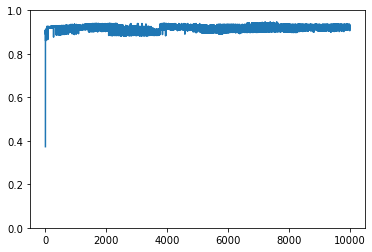

In [228]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(x_train, y_train, 10000)

In [229]:
y_pred_test = perceptron.predict(x_test)
print(accuracy_score(y_pred_test, y_test))

0.9473684210526315
